In [ ]:
import sys
sys.path.append("..")

from plotting_tools import *

In [5]:
def get_viral_load(t, tau_E, tau_Ins, tau_Isy, tau_Isev, tau_Icri, peak_symptomatic):
    tau_infected = tau_E + tau_Ins + tau_Isy + tau_Isev + tau_Icri
    viral_load_end_date = tau_E + tau_infected
    # peak viral load is reached when agent develops symptoms 
    t_peak = tau_E + tau_E + tau_Ins
    peak = peak_symptomatic
    incline = peak_symptomatic / (tau_E + tau_Ins)
    if(tau_Isy == 0):
        # if agent is asymptomatic, peak viral load is reached in the middle of infected period
        t_peak = tau_E + 0.5 * (tau_infected)
        peak = incline * (t_peak - tau_E)
    decline = - peak / (viral_load_end_date - t_peak)
    if (t >= tau_E and t <= viral_load_end_date):
        if(t <= tau_E + peak / incline):
            return incline * (t - tau_E)
        else:
            return peak + decline * (t - peak / incline - tau_E)
    return 0.

In [6]:
def get_infectivity(t, tau_E, tau_Ins, tau_Isy, tau_Isev, tau_Icri, alpha, beta, peak_symptomatic):
    # time points and periods should be in days
    # time shift is 0.6 * time agent is exposed
    time_shift = 0.6 * tau_E
    if(tau_E + time_shift >= t):
        return 0.
    infectivity = 0.75 / (1 + np.exp(-(alpha + beta * get_viral_load(t - time_shift, tau_E, tau_Ins, tau_Isy, tau_Isev, tau_Icri, peak_symptomatic))))
    return infectivity

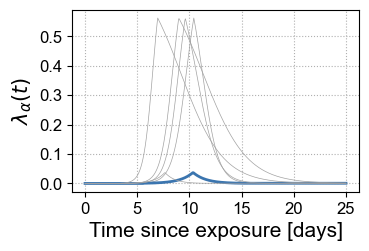

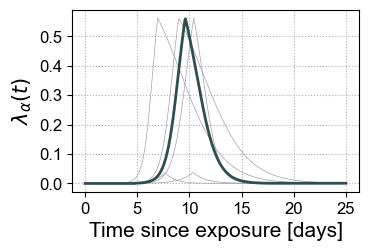

In [8]:
peak_symptomatic = 8.1
t_E = 0.
tau_E_list = [3.2, 3.5, 2.5, 2.8, 2.1, 3]
tau_Ins_list = [2.1, 6., 4.8, 1.7, 1.5, 1.8]
tau_Isy_list = [6.1, 0., 0., 6., 5., 7.9]
tau_Isev_list = [0., 0., 0., 11., 4.8, 0.]
tau_Icri_list = [0., 0., 0., 0., 6.5, 0.]
alpha = -7.
beta = 1.

panel_pos = [0.16, 0.2, 0.7, 0.7]  
figsize = (4.1, 2.6)

# Agent 1
fig = plt.figure(figsize=figsize)
ax = fig.add_axes(panel_pos)
# The time frame plotted is 25 days
time = np.linspace(0, 25, 500)
for i in range(len(tau_E_list)):
    y = [get_infectivity(t, tau_E_list[i], tau_Ins_list[i], tau_Isy_list[i], tau_Isev_list[i], tau_Icri_list[i], alpha, beta, peak_symptomatic) for t in time]
    color = colors['Medium grey']
    line_width = 0.5
    if(i == 1):
        color = colors['Blue']
        line_width = 2
    ax.plot(time, y, color = color, linewidth = line_width)
ax.set_xlabel("Time since exposure [days]",)
ax.xaxis.set_ticks(np.arange(0, 30, 5))
ax.yaxis.set_ticks(np.arange(0, 0.6, 0.1))
ax.set_ylabel(r'$\lambda_\alpha(t)$')
ax.grid(linestyle='dotted')
fig.savefig('infectivity_a1.png', dpi=dpi)
plt.show()

# Agent 2
fig = plt.figure(figsize=figsize)
ax = fig.add_axes(panel_pos)
time = np.linspace(0, 25, 500)
for i in range(len(tau_E_list)):
    y = [get_infectivity(t, tau_E_list[i], tau_Ins_list[i], tau_Isy_list[i], tau_Isev_list[i], tau_Icri_list[i], alpha, beta, peak_symptomatic) for t in time]
    color = colors['Medium grey']
    line_width = 0.5
    if(i == 5):
        color = colors['Dark green']
        line_width = 2
    ax.plot(time, y, color = color, linewidth = line_width)
ax.set_xlabel("Time since exposure [days]",)
ax.xaxis.set_ticks(np.arange(0, 30, 5))
ax.yaxis.set_ticks(np.arange(0, 0.6, 0.1))
ax.set_ylabel(r'$\lambda_\alpha(t)$')
ax.grid(linestyle='dotted')
fig.savefig('infectivity_a2.png', dpi=dpi)
plt.show()